# Monte Carlo method

The Monte Carlo method is a computational technique used to estimate numerical results through the use of random sampling and statistical analysis.

In [4]:
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib widget

## Approximation of π

Let's r be the radius of the circle.
\begin{align}
\text{Area of square}&=A_s=(2r)^2=4r^2\\
\text{Area of the circle}&=A_c=\pi r^2\\
\frac{A_c}{A_s}&=\frac{\pi}{4}
\end{align}
Algorithm steps are given below.

1.   Generate pairs of uniform random coordinates (x, y) each ranging from $-r$ to $r$.
2.   Define $n$ as the total number of points and $m$ as the total number of points within the circle.
3.   Calculate $x^2 + y^2$.
4.   If the $x^2 + y^2$ is less than or equal to $r^2$, the point falls within the circle and increase $m$ by one.
5.   Repeat steps 1-4 (except 2) for $n$ number of points.
6.   Compute the $\frac{m}{n}$.
7.   Multiply the ratio by 4 to approximate $\pi$.

In [5]:
def approximate_pi(r, n):
  """
  r - radius of the circle
  n - total number of points
  """
  x = np.random.uniform(-r, r, n)
  y = np.random.uniform(-r, r, n)

  x_inside = np.array([])
  y_inside = np.array([])
  x_outside = np.array([])
  y_outside = np.array([])

  m = 0 # number of point insice the circle
  for i in range(n):
    if x[i]**2 + y[i]**2 <= r**2:
      m += 1
      x_inside = np.append(x_inside, x[i])
      y_inside = np.append(y_inside, y[i])
    else:
      x_outside = np.append(x_outside, x[i])
      y_outside = np.append(y_outside, y[i])

  pi_approximation = 4*(m/n)

  return x_inside, y_inside, x_outside, y_outside, pi_approximation

Aproximation for pi = 3.1648
Percentage error = 0.7387127794460775 %


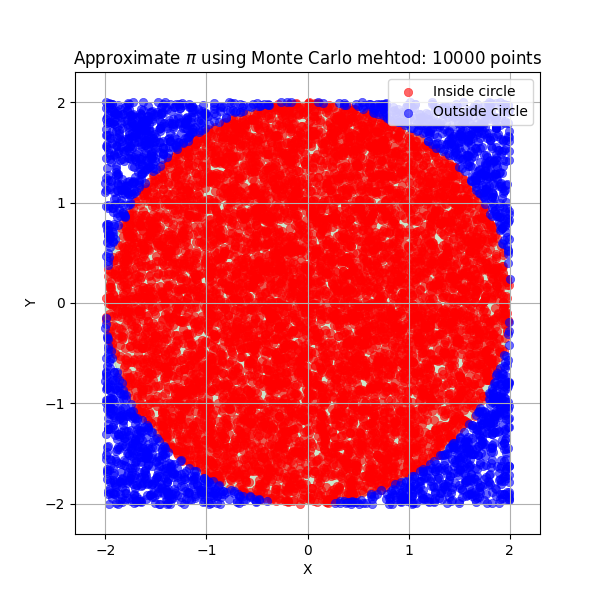

In [6]:
r = 2
r_offset = 0.3
num_points = 10000

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6, 6)
ax.add_artist(plt.Circle((0, 0), r, color='g', alpha=0.2))
ax.set_xlim(-r-r_offset, r+r_offset)
ax.set_ylim(-r-r_offset, r+r_offset)

x_inside, y_inside, x_outside, y_outside, pi_approximation = approximate_pi(r, num_points)
print(f"Aproximation for pi = {pi_approximation}")
print(f"Percentage error = {(np.abs(pi_approximation-np.pi) / np.pi)*100} %")
ax.scatter(x_inside, y_inside, c='r',  marker='o', linewidths=0.5, alpha=0.6, label="Inside circle")
ax.scatter(x_outside, y_outside, c='b',  marker='o', linewidths=0.5, alpha=0.6, label="Outside circle")
ax.set_title(rf'Approximate $\pi$ using Monte Carlo mehtod: {num_points} points')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.legend()
plt.grid()
plt.show()

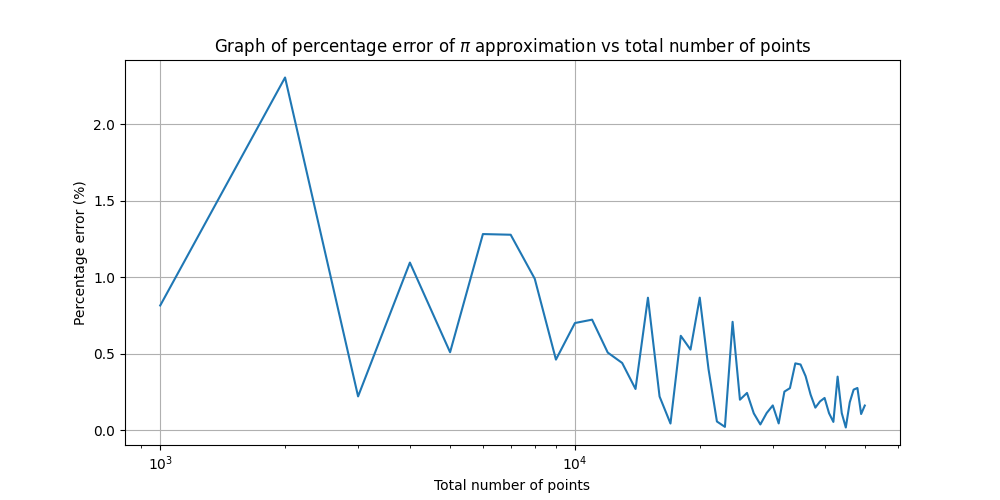

In [8]:
num_points_arr = np.arange(1000, 5*10**4 + 1, 1000)
r = 2

pi_approximation_arr = map(lambda n: approximate_pi(r, n)[4], num_points_arr)
percentage_error_arr = list(map(lambda x: (np.abs(x - np.pi)/np.pi)*100, pi_approximation_arr))
plt.figure(figsize=(10, 5))
plt.semilogx(num_points_arr, percentage_error_arr)
plt.xlabel("Total number of points")
plt.ylabel("Percentage error (%)")
plt.title(r"Graph of percentage error of $\pi$ approximation vs total number of points")
plt.grid()
plt.show()

By the above plot, it can be seen that when the total number of points are increased the the percentage error tends to converge to 0 \%. Therefore the accuracy of the $\pi$ approximation improves as the total number of uniform randomly generated points is increased. As more points are sampled, the estimate converges toward the actual value of $\pi$.

## Area between Curves

Monte Carlo method can also be used to approximate the area between two curves. This method is also similar to the method used in Approximation of $\pi$. To demonstrate the process two functions are selected which are defined in $x \in [0, 1]$. These two functions have two intersection points at (0, 0.5) and (1, 0.4).
\begin{align}
  f(x)&=-2.1x^2 + 2x + 0.5\\
  g(x)&=-0.1x + 0.5
\end{align}
Algorithm steps for approximating the area between two curves in the Equations is given below.

1.   Select a rectangular region that contains the area between two curves that need to be calculated. Therefore the rectangular region which contains $x \in [0, 1]$ and $y \in [0, 1]$ is selected.
2.   Define $n$ as the total number of points and $m$ as the total number of points within the area between two curves.
3.   Generate uniform, random $n$ number of points contained within rectangular region.
4.   For each point in rectangular region evaluate $y \leq f(x) \text{ and } y \geq g(x)$. If the condition is satisfied, that point falls within the region between two curves and increase $m$ by one.
5.   Compute the $\frac{m}{n}$.
6.   Multiply the ratio by the area of the rectangular region then obtain the area approximation for the region between two curves.

$$
\text{Area of rectangle}=A_r=pq\\
\text{Area between two curves}=A_c\\
\frac{A_c}{A_r}=\frac{A_c}{pq}
$$
Note that the analytical solution can be obtained from $A_c=\int_0^1 -2.1x^2 + 2x + 0.5 \,dx - \int_0^1 -0.1x + 0.5 \,dx = \frac{7}{20} = 0.35$.

In [9]:
func_1 = lambda x: -2.1*x**2 + 2*x + 0.5
func_2 = lambda x: -0.1*x + 0.5

In [10]:
def area_between_curves(func_1, func_2, x_min, x_max, y_min, y_max, n):
  """
  func_1 , func_2 = fucntions which enclosed the area
  x_min, x_max = lower and upper x bound for bounding box
  y_min, y_max = lower and upper x bound for bounding box
  n - number of total points
  """

  x = np.random.uniform(x_min, x_max, n)
  y = np.random.uniform(y_min, y_max, n)

  condition = (y <= func_1(x)) & (y >= func_2(x))
  x_inside = x[condition]
  y_inside = y[condition]
  x_outside = x[~condition]
  y_outside = y[~condition]
  m = len(y_inside)
  area_approximation = (m/n)*((x_max - x_min)*(y_max-y_min))

  return x_inside, y_inside, x_outside, y_outside, area_approximation

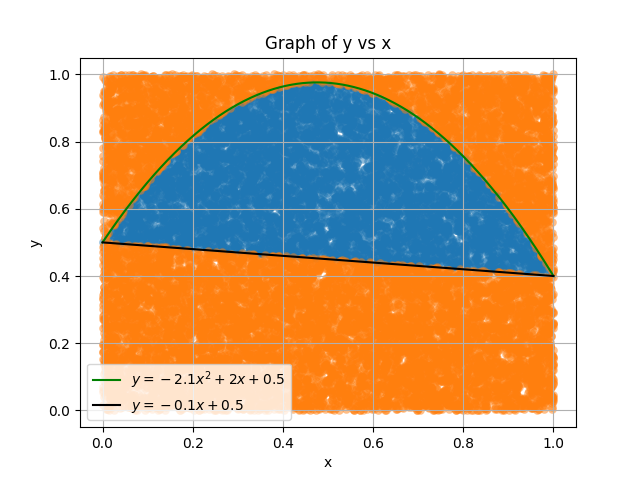

Apriximated area between curves = 0.34745
Percentage error = 0.7285714285714276 %


In [11]:
num_points = 20000

plt.figure()
x_inside, y_inside, x_outside, y_outside, area_approximation = area_between_curves(func_1, func_2, 0, 1, 0, 1, num_points)
x = np.sort(np.hstack((x_inside, x_outside)))
plt.plot(x, func_1(x), c='g', label=r"$y=-2.1x^2 + 2x + 0.5$")
plt.plot(x, func_2(x), c='k', label=r"$y=-0.1x + 0.5$")
plt.scatter(x_inside, y_inside,  lw=0.1, alpha=0.5)
plt.scatter(x_outside, y_outside,  lw=0.1, alpha=0.5)
plt.xlabel("x")
plt.ylabel('y')
plt.title("Graph of y vs x")
plt.grid()
plt.legend()
plt.show()

print(f"Apriximated area between curves = {area_approximation}")
print(f"Percentage error = {(np.abs(area_approximation-0.35) / 0.35)*100} %")

## Area defined by constraint

The approach is similar to the approximating area between curves. To demonstrate the method, the inequality equation given below is used as the constraint which confined a space in xy plane.
\begin{align}
  \left( x^2+y^2-2x \right)^2 \leq 4 \left( x^2+4y^2 \right)
\end{align}
Algorithm steps for approximating the area defined by the constraint
is given below.

1.   Select a rectangular region that contains the area which satisfy the constraint. Therefore the rectangular region which contains $x \in [-10, 10]$ and $y \in [-10, 10]$ is selected.
2.   Define $n$ as the total number of points and $m$ as the total number of points which satisfy the constraint.
3.   Generate uniform, random $n$ number of points contained within rectangular region.
4.   For each point in rectangular region evaluate $\left( x^2+y^2-2x \right)^2 - 4 \left( x^2+4y^2 \right) \leq 0$. If the condition is satisfied, that point falls within the region which satisfy the constraint and increase $m$ by one.
5.   Compute the $\frac{m}{n}$.
6.   Multiply the ratio by the area of the rectangular region then obtain the area approximation for the region which satisfy the constraint.

In [12]:
func_1 = lambda x, y: (x**2 + y**2 - 2*x)**2
func_2 = lambda x, y: 4*(x**2 + 4*y**2)

In [13]:
def area_between_curves_2(func_1, func_2, x_min, x_max, y_min, y_max, n):
  """
  func_1 , func_2 = fucntions which enclosed the area
  x_min, x_max = lower and upper x bound for bounding box
  y_min, y_max = lower and upper x bound for bounding box
  n - number of total points
  """

  x = np.random.uniform(x_min, x_max, n)
  y = np.random.uniform(y_min, y_max, n)

  condition = (func_1(x, y) - func_2(x, y)) <= 0
  x_inside = x[condition]
  y_inside = y[condition]
  x_outside = x[~condition]
  y_outside = y[~condition]
  m = len(y_inside)
  area_approximation = (m/n)*((x_max - x_min)*(y_max-y_min))

  return x_inside, y_inside, x_outside, y_outside, area_approximation

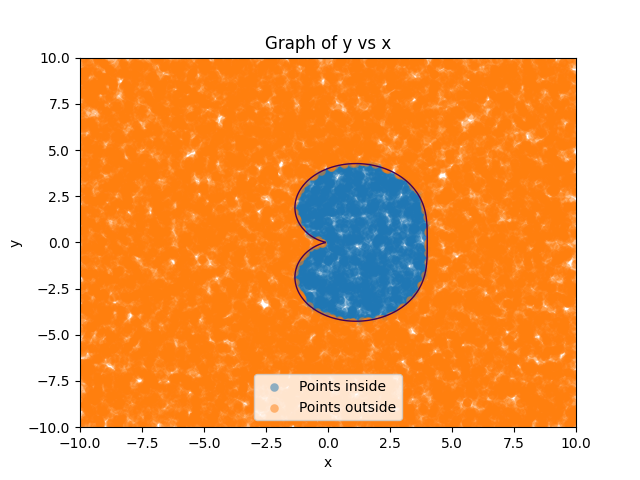

Apriximated area between curves = 37.96


In [14]:
num_points = 20000

plt.figure()
x_inside, y_inside, x_outside, y_outside, area_approximation = area_between_curves_2(func_1, func_2, -10, 10, -10, 10, num_points)
x = np.sort(np.hstack((x_inside, x_outside)))
plt.scatter(x_inside, y_inside,  lw=0.1, alpha=0.5, label="Points inside")
plt.scatter(x_outside, y_outside,  lw=0.1, alpha=0.5, label="Points outside")

# Plot the ecnclosed region
x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)
X, Y = np.meshgrid(x, y)
Z = func_1(X, Y) - func_2(X, Y)
plt.contour(X, Y, Z, levels=[0], linewidths=1)

plt.xlabel("x")
plt.ylabel('y')
plt.title("Graph of y vs x")
plt.legend()
plt.show()

print(f"Apriximated area between curves = {area_approximation}")

## Voltage Divider

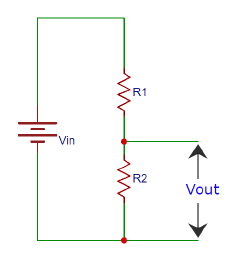

The tolerance of a resistor refers to the maximum allowable deviation in resistance from its specified or nominal value. It accounts for manufacturing variations, environmental factors, and other influences that can affect the actual resistance of the component. Generally in fixed resistors, tolerance is represent as a percentage. To demonstrate the variation of $V_{out}$ due to tolerance of $R_1$ and $R_2$, it is assumed to be $R_1=3.3\ k\Omega$ and tolerance 5\%, $R_2=4.7\ k\Omega$ and tolerance 2\% and $V_{in}=6\ V$. Here a sample of 1000 resistors for each $R_1$ and $R_2$ were selected. First plot the histograms for resistance of $R_1$ and $R_2$. Here it is assumed to be the distribution of resistance of $R_1$ and $R_2$ is uniform in their tolerance range.

In [15]:
num_resistors = 1000
R1 = 3300
R1_tol = 5/100
R2 = 4700
R2_tol = 2/100
V_in = 6

r1_arr = np.random.uniform(R1*(1 - R1_tol), R1*(1 + R1_tol), num_resistors)
r2_arr = np.random.uniform(R2*(1 - R2_tol), R2*(1 + R2_tol), num_resistors)

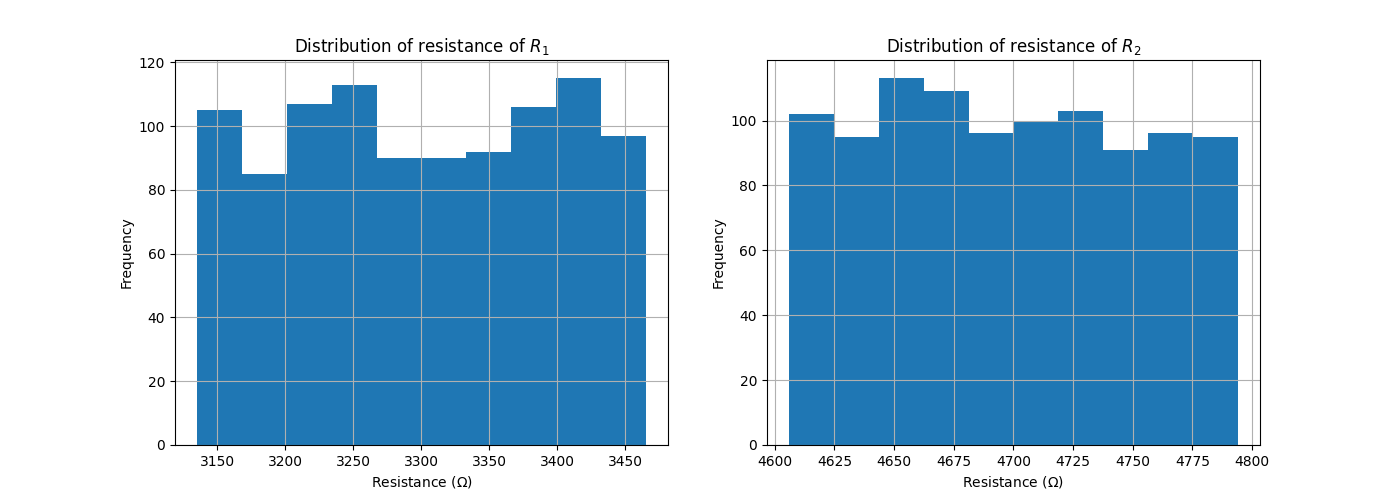

In [16]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.hist(r1_arr)
plt.title(r'Distribution of resistance of $R_1$')
plt.xlabel(r'Resistance $(\Omega)$')
plt.ylabel('Frequency')
plt.grid()

plt.subplot(122)
plt.hist(r2_arr)
plt.title(r'Distribution of resistance of $R_2$')
plt.xlabel(r'Resistance $(\Omega)$')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Based on Ohm's law, $V_{out}$ can be defined as $V_{out}=R_2 \left( \frac{V_{in}}{R_1+R_2} \right )$. Therefore the distribution $V_{out}$ can be calculated.

Mean V_out = 3.524449096945511
Standard deviation of V_out = 0.04551486527420531


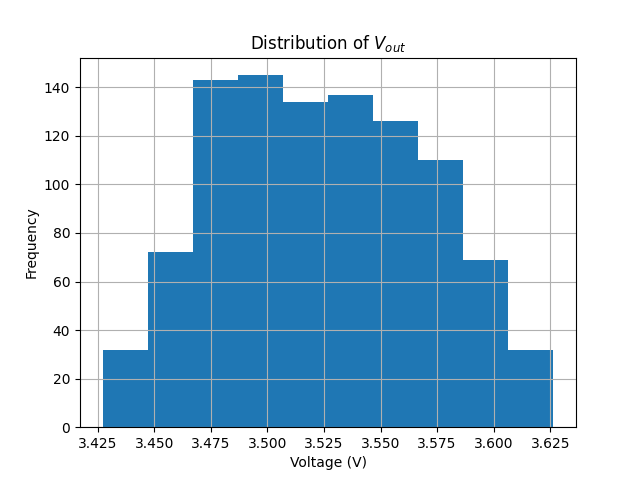

In [17]:
V_out_arr = r2_arr*(V_in/(r1_arr+r2_arr))
print(f"Mean V_out = {np.mean(V_out_arr)}")
print(f"Standard deviation of V_out = {np.std(V_out_arr)}")

plt.figure()
plt.hist(V_out_arr)
plt.title(r'Distribution of $V_{out}$')
plt.xlabel(r'Voltage (V)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

By using the nominal values of the resistors $V_{out}=3.525\ V$. We can see that the mean of this distribution is approximately equal to this value also.

## Monte Carlo Integration

Monte Carlo integration uses random sampling of a function to numerically compute an estimate of its integral. For a Given a set of N uniform random variables $x_i \in (a,b)$, the Monte Carlo estimation for integration can be defined as in Equation given below.
\begin{align}
    \int_a^b f(x) \,dx \approx \frac{b-a}{N}\sum_{i=1}^N f(x_i)
\end{align}
As an example, calculate the integral of $sin(x)$ from 0 to π using Monte Carlo Method.

In [18]:
num_rand_var = 1000
a, b = 0, np.pi

x_arr = np.random.uniform(a, b, num_rand_var)
integral = ((b-a)/num_rand_var)*np.sum(np.sin(x_arr))
print(f"Integral approximation = {integral}")
print(f"Percentage error = {(np.abs(integral - 2)/2)*100} %")

Integral approximation = 2.0034012743666247
Percentage error = 0.170063718331237 %


## Random walk

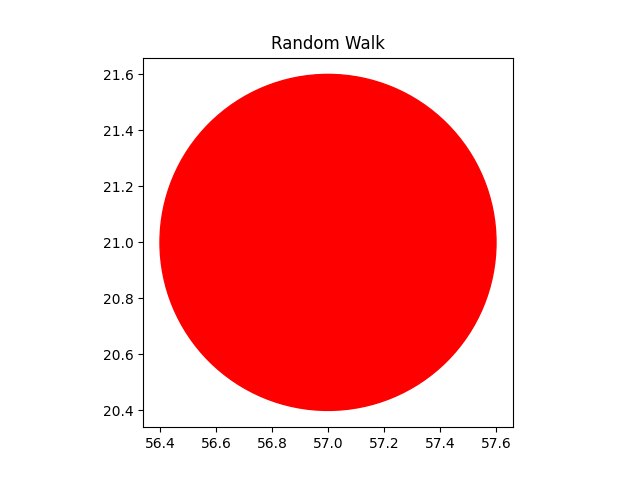

In [19]:
# Initial position and velocity vectors.
x0, y0 = np.random.randint(0,100),np.random.randint(0,100)

def move_particle():
    d= np.random.random()
    dx,dy = 0,0
    step_size = 1

    if (d <= 0.25 ):
        dy = step_size                       #North
    elif (d > 0.25 and d <= 0.5):
        dx = step_size                       #East
    elif (d > 0.5 and d <= 0.75):
        dy = -step_size                      #South
    else:
        dx = -step_size                      #West
    return dx,dy

def get_pos(t=0):
    x, y = x0, y0
    while t < 10000:
        dx,dy = move_particle()
        t += 1
        if x + dx < 0:
            x += -dx
        elif x + dx > 100:
            x += -dx
        else:
            x += dx

        if y + dy < 0:
            y += -dy
        elif y + dy > 100:
            y += -dy
        else:
            y += dy

        yield x, y

def init():
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    line.set_data(xdata, ydata)
    ball.set_center((x0, y0))
    height_text.set_text(f'(x,y) = {x0},{y0}')
    return line,ball

def animate(pos):
    x, y = pos
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    ball.set_center((x, y))
    height_text.set_text(f'(x,y) = {x},{y}')
    return line,ball

# Set up a new Figure, with equal aspect ratio so the ball appears round.
fig, ax = plt.subplots()
ax.set_aspect('equal')

# These are the objects we need to keep track.
line, = ax.plot([], [], lw=1)
ball = plt.Circle((x0, y0), radius=0.6, color='r')
ax.add_patch(ball)
xdata, ydata = [], []
height_text = ax.text(10, 90, f'(x,y) = {x0},{y0}')

interval = 2
ani = animation.FuncAnimation(fig, animate, get_pos, blit=True,
                      interval=interval, repeat=False, init_func=init, cache_frame_data=False)
plt.title("Random Walk")
plt.show()

In [6]:
plt.close('all')

## Modeling diffusion

The sample code given in LMS was modified to give the ability to change the number of particles (A or B), number of time steps and step size.

In [20]:
def diffusion(na, nb, ns, boundry, sa, sb):
    """
    Function for diffusion for given number of time steps.

    Parameters:
      na(int) : Number of A particles
      nb(int) : Number of B particles
      ns(int) : Number of time steps
      boundry(tupple) : Boundry of movement
      sa(int) : Step size of A particles
      sb(int) : Step size of B particles
    """

    l_boundry = (boundry[0], boundry[1]//2)    # Boundry for movements in x axis in left side
    r_boundry = (boundry[1]//2, boundry[1])    # Boundry for movements in x axis in right side
    y_boundry = (boundry[0], boundry[1]//2)    # Boundry y axis in both side

    fnuma_l = np.zeros(ns)    #  Final number of molecules type A in left side in given time step
    fnuma_r = np.zeros(ns)    #  Final number of molecules type A in right side in given time step
    fnumb_l = np.zeros(ns)    #  Final number of molecules type B in left side in given time step
    fnumb_r = np.zeros(ns)    #  Final number of molecules type B in right side in given time step

    t_steps = np.arange(ns)                                  # Array of time steps
    xa = np.random.rand(na) * l_boundry[1]                   # x coordinates of all molecules - type A
    ya = np.random.rand(na) * y_boundry[1]                   # y coordinates of all molecules - type A
    xb = np.random.rand(nb) * r_boundry[0] + r_boundry[0]    # x coordinates of all molecules - type B
    yb = np.random.rand(nb) * y_boundry[1]                   # y coordinates of all molecules - type B

    for j in range(ns):
        # Go through time stetps

        numa_l = na    # Number of type A molecules in left side
        numa_r = 0     # Number of type A molecules in right side
        numb_l = 0     # Number of type B molecules in left side
        numb_r = nb    # Number of type B molecules in right side
        for i in range(na):
          # Go through each A molecule

          r = np.random.rand()
          if r < 0.5 and xa[i] > sa:                    # Movement logic for Type A to move left
              xa[i] -= sa
          elif r >= 0.5 and xa[i] < boundry[1] - sa:    # Movement logic for Type A to move right
              xa[i] += sa

          # Track in which side the ith A molecule is currently located.
          if xa[i] > r_boundry[0] and xa[i] < r_boundry[1]:
              numa_r += 1
              numa_l -= 1

        for i in range(nb):
          # Go through each B molecule

          r = np.random.rand()
          if r >= 0.5 and xb[i] < boundry[1] - sb:      # Movement logic for Type B to move Right
              xb[i] += sb
          elif r < 0.5 and xb[i] > sb:                  # Movement logic for Type B to move left
              xb[i] -= sb

          # Track in which side the ith B molecule is currently located.
          if xb[i] < l_boundry[1] and xb[i] > l_boundry[0]:
              numb_l += 1
              numb_r -= 1

        fnuma_l[j] = numa_l
        fnuma_r[j] = numa_r
        fnumb_l[j] = numb_l
        fnumb_r[j] = numb_r

    return t_steps, fnuma_l, fnuma_r, fnumb_l, fnumb_r

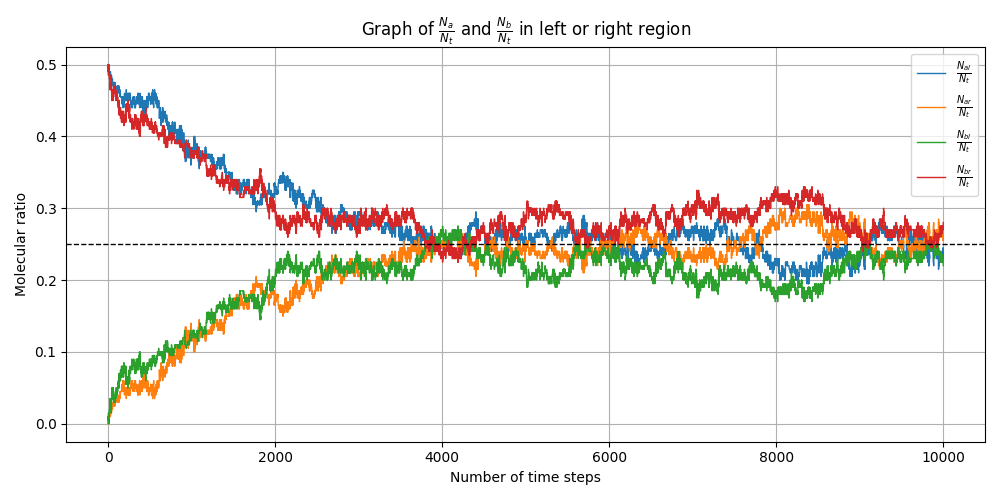

In [21]:
na, nb = 100, 100
sa, sb = 1, 1
ns = 10000
boundry = (0, 100)
nt = na + nb # Total number of molecules

t_steps, fnuma_l, fnuma_r, fnumb_l, fnumb_r = diffusion(na, nb, ns, boundry, sa, sb)

plt.figure(figsize=(10, 5))
plt.plot(t_steps, fnuma_l / nt, label=r"$\frac{N_{al}}{N_t}$", lw=1, ms=1)
plt.plot(t_steps, fnuma_r / nt, label=r"$\frac{N_{ar}}{N_t}$", lw=1, ms=1)
plt.plot(t_steps, fnumb_l / nt, label=r"$\frac{N_{bl}}{N_t}$", lw=1, ms=1)
plt.plot(t_steps, fnumb_r / nt, label=r"$\frac{N_{br}}{N_t}$", lw=1, ms=1)
plt.axhline(y = 0.25, ls='--', c='k', lw=1)
plt.legend()
plt.title(r"Graph of $\frac{N_a}{N_t}$ and $\frac{N_b}{N_t}$ in left or right region")
plt.xlabel("Number of time steps")
plt.ylabel("Molecular ratio")
plt.grid()
plt.tight_layout()
plt.show()

## Diffusion-limited aggregation (DLA)

This code is modified to answer the **"DLA 2"** in lab sheet.

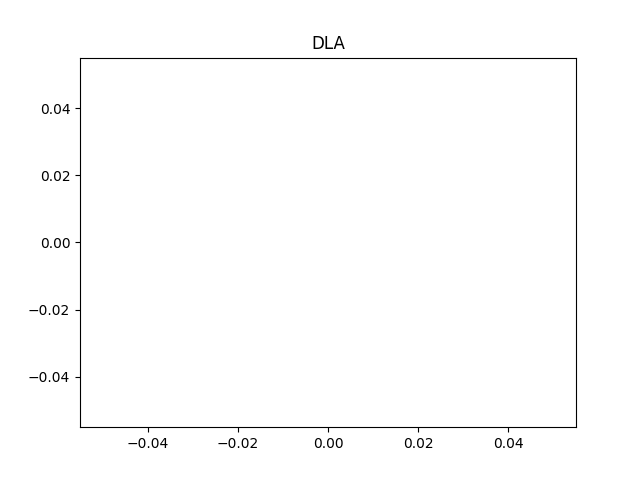

In [22]:
# height and width
h = 50
w = 50
lattice = np.zeros((h + 2, w + 2))

# create 3 random immobile particles on upper boundary
for i in range(3):
    x0, y0 = np.random.randint(1, w), h
    lattice[x0, y0] = 1    # initial immoble particle location

def init():
    ax.axis([0, w, 0, h])
    xi, yi = np.where(lattice)
    hl.set_xdata(xi)
    hl.set_ydata(yi)
    return (hl, )

def update(frame):
    global lattice

    # generate random seed.
    x, y = np.random.randint(0, w), 0
    i = 1
    max_iterations = 10e6  # Set a maximum number of iterations for safety
    while i <= max_iterations:
        # walk that seed randomly in 8 direction
        directions = [(1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (-1, -1), (0, -1), (1, -1)]
        dr = directions[np.random.randint(0, len(directions))]

        x += dr[0]
        y += dr[1]

        # preventing the walker walking outside the axes
        x = min(max(x, 2), w)
        y = min(max(y, 2), h)

        if any(
            # check wheather is walker come near to a immobile particle
            [
                lattice[x - 1, y] == 1,
                lattice[x + 1, y] == 1,
                lattice[x, y + 1] == 1,
            ]
        ):
            lattice[x, y] = 1
            xi, yi = np.where(lattice)
            hl.set_xdata(xi)
            hl.set_ydata(yi)
            return (hl,)

        i += 1

fig, ax = plt.subplots()
hl, = ax.plot([], [], linestyle="none", markersize=5, marker="s")
ax.set_title("DLA")
ani = animation.FuncAnimation(fig, update, frames=200, repeat=False, blit=True, init_func=init)
plt.show()

In [23]:
plt.close("all")